# Generating and creating a chessboard #

Chessboard Creation: A chessboard pattern was generated. This pattern consists of 8x8 tiles, each of size 20x20 pixels, alternating between black (0) and white (1).

Convolution with Kernels:

Kernel 1 (Laplacian): Used for edge detection, emphasizing regions of rapid intensity change.
Kernel 2 (Sobel X): Detects horizontal edges by focusing on vertical gradients.
Kernel 3 (Sobel Y): Detects vertical edges by focusing on horizontal gradients.
Kernel 4 (Average): Averages neighboring pixels, effectively blurring the image.

Results:

The first subplot shows the original chessboard pattern.
The subsequent subplots display the results of convolving the chessboard with each of the four kernels. Each convolution output emphasizes different features of the chessboard based on the kernel's design.

Explanation of Images:
Original Chessboard: Clearly shows the 8x8 alternating black and white pattern.
Kernel 1 Convolution (Laplacian): Highlights the edges of the tiles, where the intensity changes are most significant.
Kernel 2 Convolution (Sobel X): Enhances vertical edges, making the vertical boundaries of the tiles more prominent.
Kernel 3 Convolution (Sobel Y): Enhances horizontal edges, making the horizontal boundaries of the tiles more prominent.
Kernel 4 Convolution (Average): Blurs the image, smoothing out the sharp transitions between black and white tiles.

Each convolution visually interprets the chessboard pattern in a unique way, reflecting the specific purpose and design of the respective kernel.  ​​

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# function to create a chessboard pattern
def create_chessboard(size=8, tile_size=20):
    chessboard = np.zeros([size * tile_size, size * tile_size])
    for row in range(size):
        for column in range(size):
            if (row + column) % 2 == 1:
                chessboard[row * tile_size:(row + 1) * tile_size, column * tile_size:(column + 1) * tile_size] = 1
    return chessboard


In [11]:
# function to perform 2D convolution
def conv_2d(A, kernel):
    output = np.zeros((A.shape[0] - kernel.shape[0] + 1, A.shape[1] - kernel.shape[1] + 1))
    for row in range(output.shape[0]):
        for column in range(output.shape[1]):
            output[row, column] = np.sum(A[row:row + kernel.shape[0], column:column + kernel.shape[1]] * kernel)
    return output

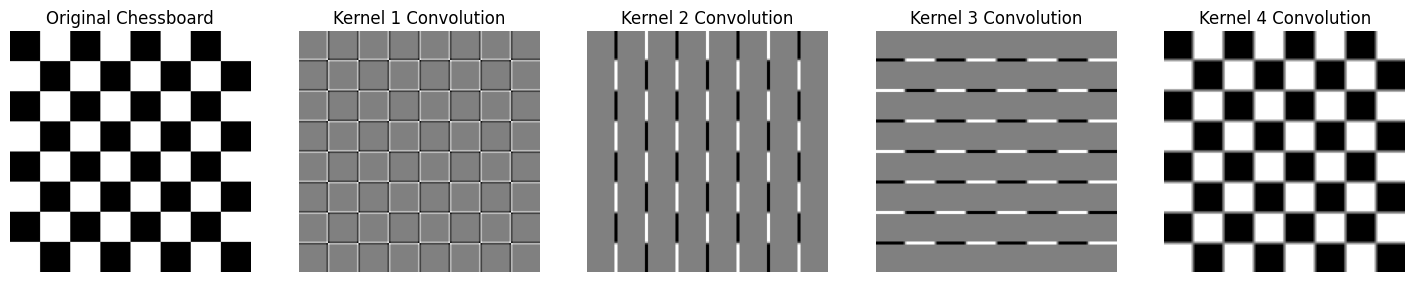

In [12]:
# Create a chessboard
chessboard = create_chessboard()

# Define kernels
kernels = [
    np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),  # Laplacian
    np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),  # Sobel X
    np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),  # Sobel Y
    np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9  # Average
]

# Display chessboard and convolution results
fig, axes = plt.subplots(1, 5, figsize=(18, 10))
axes[0].imshow(chessboard, cmap='gray')
axes[0].set_title('Original Chessboard')
axes[0].axis('off')

for i, kernel in enumerate(kernels):
    # Using custom convolution function
    conv_result = conv_2d(chessboard, kernel)
    
    # Display the result
    axes[i+1].imshow(conv_result, cmap='gray')
    axes[i+1].set_title(f'Kernel {i+1} Convolution')
    axes[i+1].axis('off')

plt.show()
